Data shape: (270, 14)
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2      

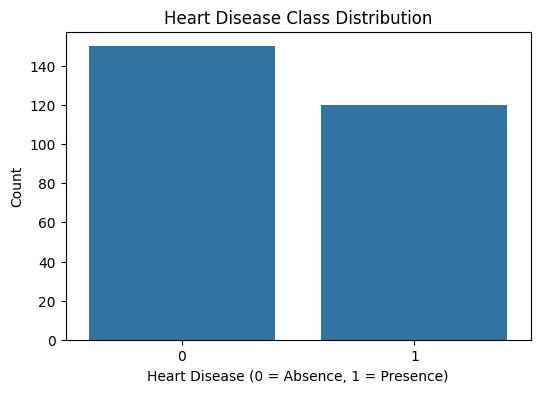

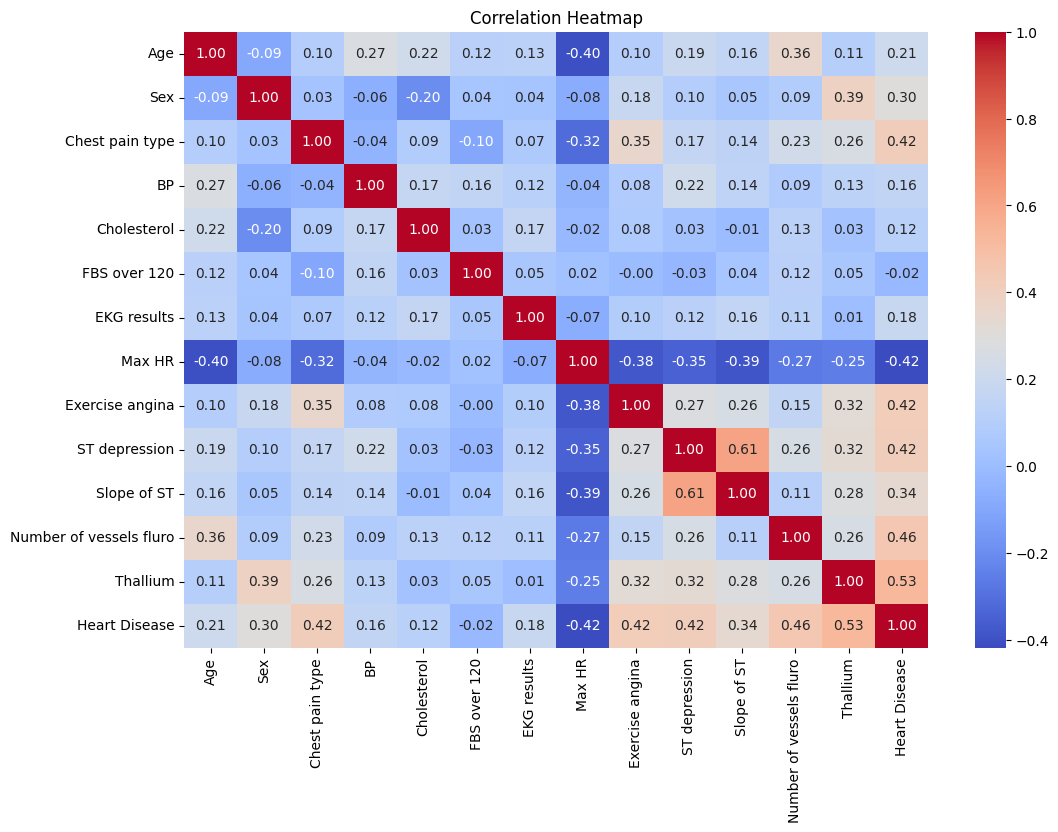

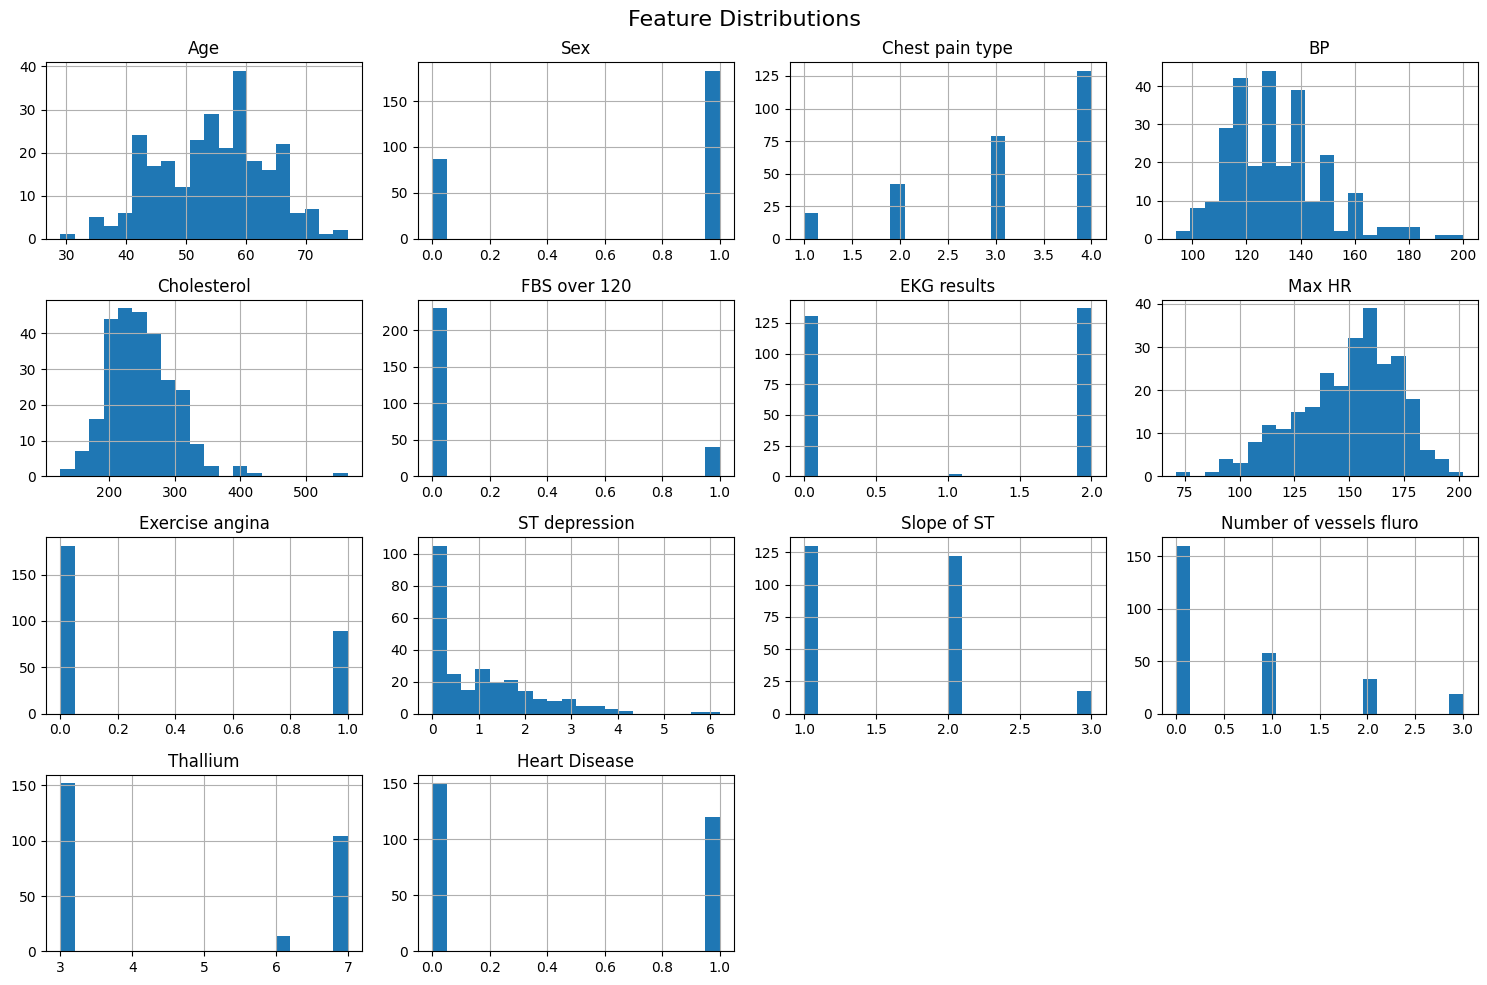

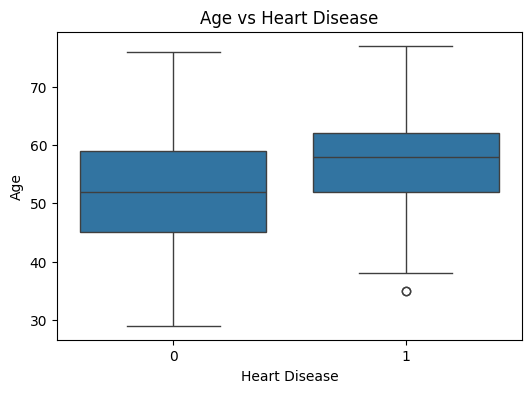

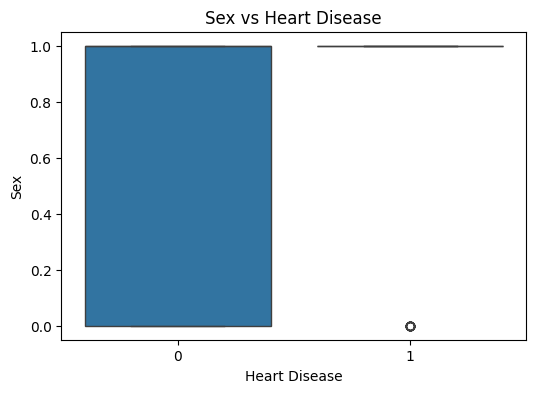

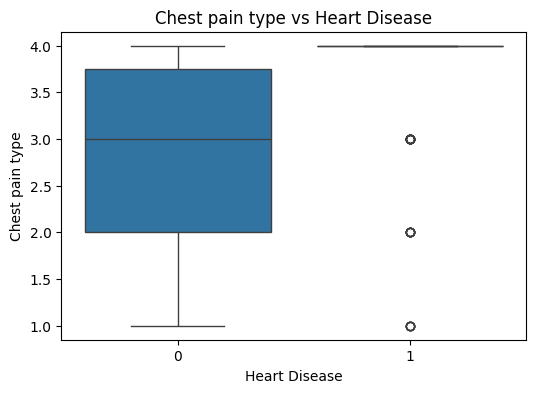

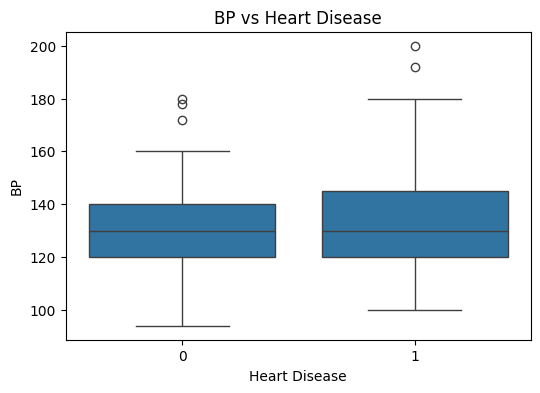

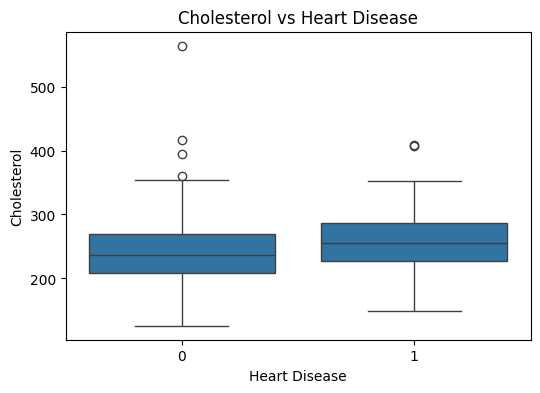

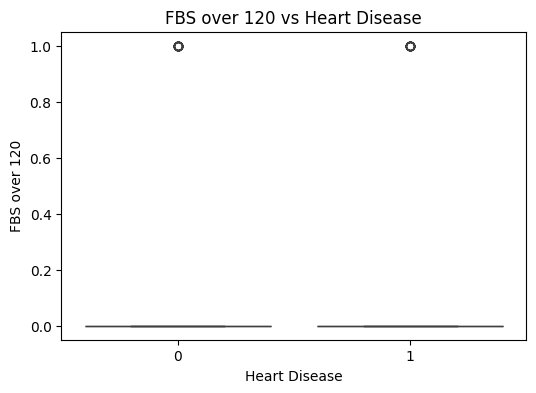

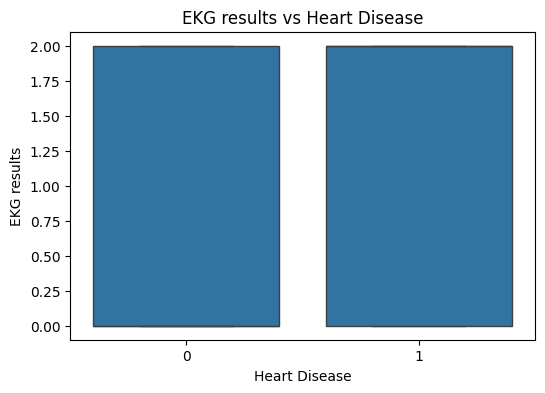

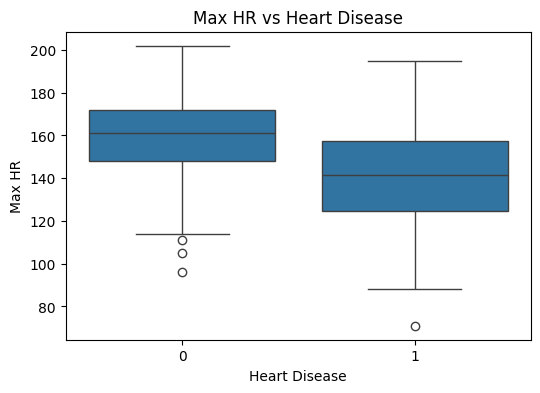

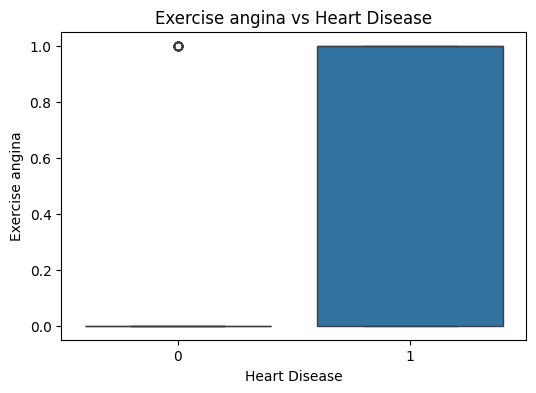

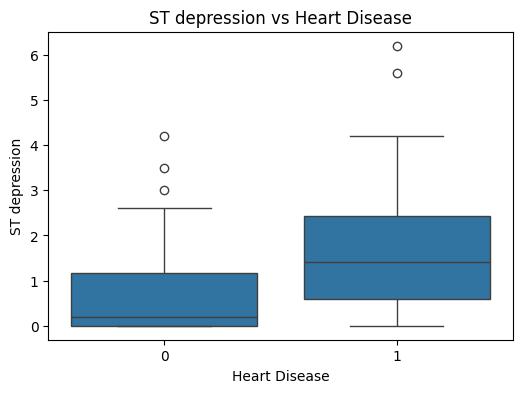

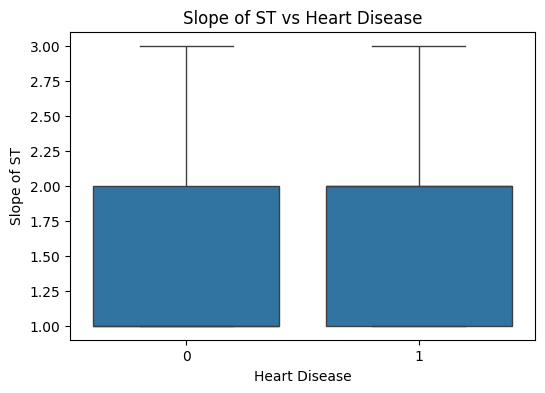

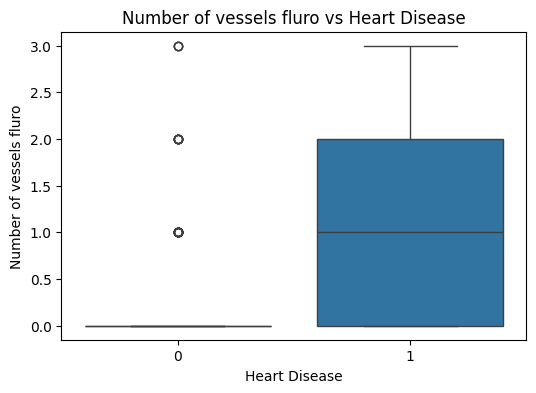

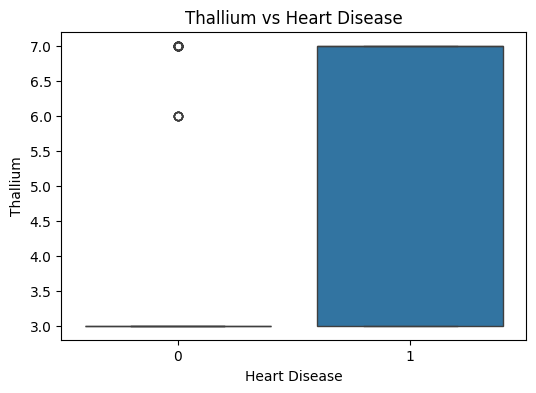


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.58      0.71      0.64        21

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.70      0.69      0.69        54


Confusion Matrix:
 [[22 11]
 [ 6 15]]


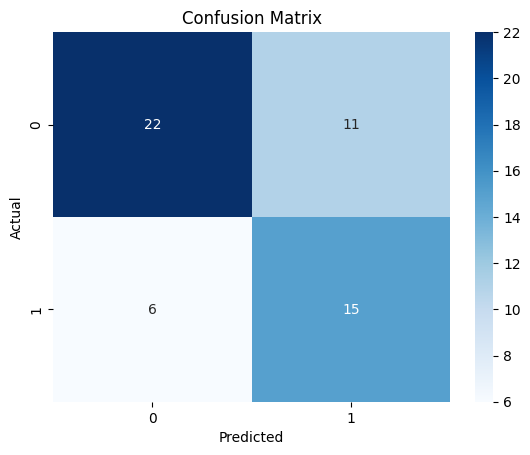

Model saved as heart_disease_model.pkl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Load data
df = pd.read_csv('Heart_Disease_Prediction.csv')  # Adjust path if needed

print("Data shape:", df.shape)
print(df.head())

# Map target values
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# ===== Exploratory Data Analysis =====

# Basic info
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease (0 = Absence, 1 = Presence)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional: for smaller datasets or selected features)
# sns.pairplot(df, hue='Heart Disease')
# plt.show()

# Distribution of numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots to see outliers and distribution across the target
for col in df.drop('Heart Disease', axis=1).select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Heart Disease', y=col, data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.show()

# ===== Model Training =====

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as heart_disease_model.pkl")
